#### MODEL 01-Interpolation of noisy data under Gaussian linear system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pi = np.pi

In [3]:
#step1:
def f(t): 
    return np.sin(t)
def f10(t):
    return np.sin(10*t)
function_list = [f,f10]              #NOTICE: FUNCTION HERE CAN BE SELECTED TO BO DIFFEREFNT WHEN TESTING

In [4]:
#step2:
D = 1000
x = np.linspace(0,2*pi,D)            #x
f_x = np.zeros(D)                    #f_x the real curve
for i in range(D):                   #make real curve
    f_x[i] = function_list[1](x[i])  #NOTICE: FUNCTION HERE CAN BE SELECTED TO BO DIFFEREFNT WHEN TESTING
index = list(range(D))               #index
shuffled_index = index.copy()        #deep copy
np.random.shuffle(shuffled_index)    #randomly shuffled index

In [5]:
#step3:
obs_noise_var = 0.1                  #variance
obs_noise_mean = 0                   #mean
N = 30                               #sample number
obs_index = shuffled_index[0:N]      #observed index
other_index = shuffled_index[N:D]    #hidden index
e = np.random.normal(obs_noise_mean,obs_noise_var**0.5,N)
                                     #random error~N

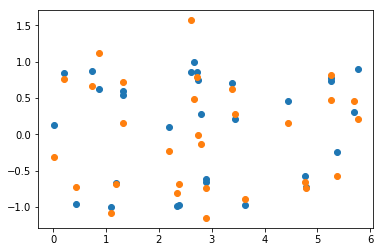

In [6]:
#step4:
A = np.zeros((N,D))                  #selection matrix A
for i in range(N):                   #produce A
    A[i,obs_index[i]] = 1
y = A.dot(f_x)                       #f(t) for chosen index
plt.plot(x[obs_index],y,'o')
y = y+e                              #f(t) after Gaussian
plt.plot(x[obs_index],y,'o')
plt.show()

#### The plot here shows the noisy sample data(orange) with their real value in f(x)(blue).

In [7]:
#step5:
L = np.zeros((D-2,D))                #construct the L
for i in range(D-2):
    L[i,i] = -1
    L[i,i+1] = 2
    L[i,i+2] = -1
L = 1/2*L
lamda = [30,5]                       #set the lamda

In [8]:
#step6:
prior_mean = 0                       #miu of prior is 0
prior_sigma_inv = (lamda[1]**(2))*np.dot(L.T, L)
                                     #NOTICE: FUNCTION HERE CAN BE SELECTED TO BO DIFFEREFNT WHEN TESTING
prior_sigma = np.linalg.inv(prior_sigma_inv)
                                     #prior's sigma
#like_mean = A.dot(f_x)              #commented because we don't know
like_sigma = obs_noise_var*np.eye(N)
                                     #likeli's sigma
like_sigma_inv = np.linalg.inv(like_sigma)
                                     #likeli's sigma's inverse
post_sigma_inv = prior_sigma_inv+((A.T).dot(like_sigma_inv)).dot(A)
post_sigma = np.linalg.inv(post_sigma_inv)
                                     #posterior's sigma
post_mean = post_sigma.dot(((A.T).dot(like_sigma_inv)).dot(y))
post_diag_sigma = np.diag(post_sigma)
CI1 = post_mean+2*(post_diag_sigma)**0.5
CI2 = post_mean-2*(post_diag_sigma)**0.5
                                     #calculate the 95% confidence interval

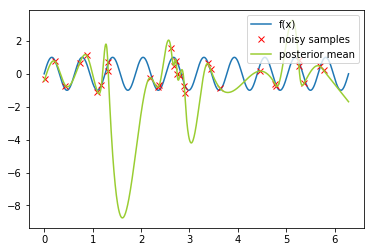

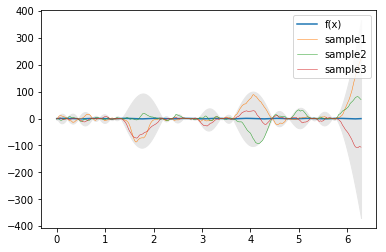

In [9]:
#plot1: posterior mean, noisy samples, real f
plt.figure()
fx_curve, = plt.plot(x,f_x)
# plt.rcParams['figure.dpi'] = 100
samples_curve, = plt.plot(x[obs_index],y,'rx')
post_mean_curve, = plt.plot(x,post_mean,'yellowgreen')
l1 = plt.legend([fx_curve,samples_curve, post_mean_curve], ["f(x)","noisy samples","posterior mean"],
               loc = 'upper right')
plt.show()

#plot1: 95% confidence interval, 3 random posterior samples, real f
plt.figure()
fx_curve, = plt.plot(x,f_x)
curve_set = []
for i in range(3):
    int_f = np.random.multivariate_normal(post_mean,post_sigma,1)
    temp_curve, = plt.plot(x,int_f[0],linewidth=0.5)
    curve_set.append(temp_curve)
plt.fill_between(x,CI1,CI2,color=(0.9,0.9,0.9))
l2 = plt.legend([fx_curve,curve_set[0],curve_set[1],curve_set[2]],
                ["f(x)","sample1","sample2","sample3", ],
               loc = 'upper right')
plt.show()

#### Ps: To keep the code simple and clear, the experiments for different functions and lamda is implemented by selecting different indice of function_list and lamda(python list). The results in detail seeing in the report.